In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('avocado.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year from 'Date'
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

data.head()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2015


In [2]:
# Select features for regression
X = data[['AveragePrice', 'Total Volume', 'type', 'Month', 'Year']]

# One-hot encode the 'type' column (convert categorical to numerical)
X = pd.get_dummies(X, drop_first=True)

# Target variable for each type of bag
y_small_bags = data['Small Bags']
y_large_bags = data['Large Bags']
y_xlarge_bags = data['XLarge Bags']

# Multiple Linear Regression Approach

Small Bags - Mean Squared Error: 43890867239.18614
Small Bags - R-squared: 0.9323940647237899


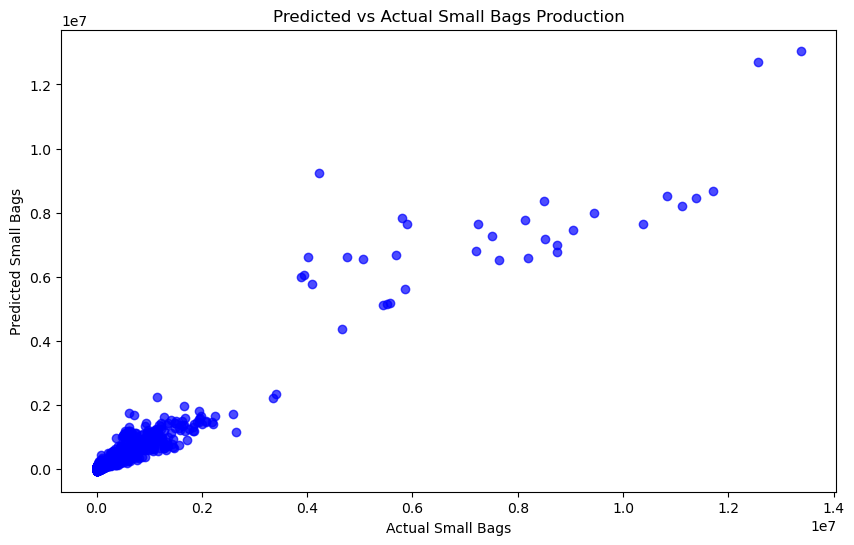

In [5]:
# Split the data into training and testing sets for Small Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_small_bags, test_size=0.2, random_state=42)

# Train the model for Small Bags
model_small_bags = LinearRegression()
model_small_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_small_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Small Bags - Mean Squared Error: {mse}')
print(f'Small Bags - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.title('Predicted vs Actual Small Bags Production')
plt.xlabel('Actual Small Bags')
plt.ylabel('Predicted Small Bags')
plt.show()

Large Bags - Mean Squared Error: 15327179887.209892
Large Bags - R-squared: 0.7705878971207856


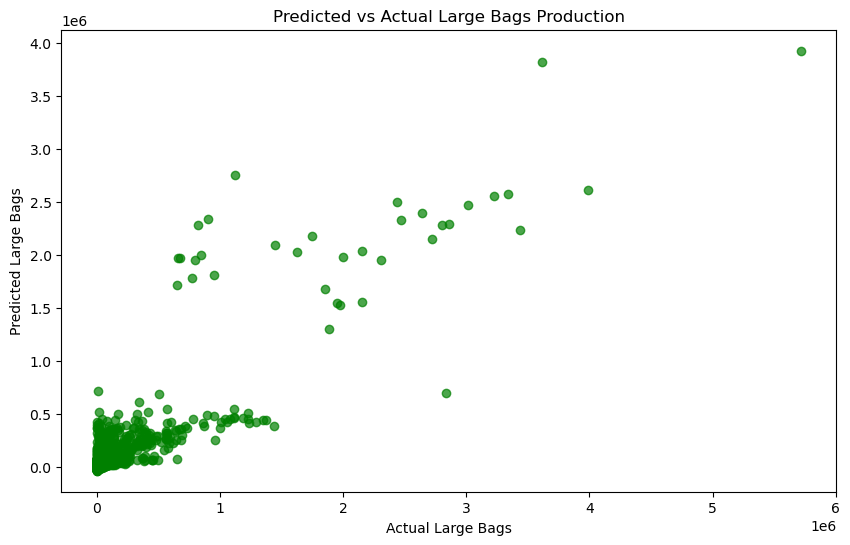

In [6]:
# Split the data into training and testing sets for Large Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_large_bags, test_size=0.2, random_state=42)

# Train the model for Large Bags
model_large_bags = LinearRegression()
model_large_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_large_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Large Bags - Mean Squared Error: {mse}')
print(f'Large Bags - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='g')
plt.title('Predicted vs Actual Large Bags Production')
plt.xlabel('Actual Large Bags')
plt.ylabel('Predicted Large Bags')
plt.show()

XLarge Bags - Mean Squared Error: 139385467.99298733
XLarge Bags - R-squared: 0.571274030342886


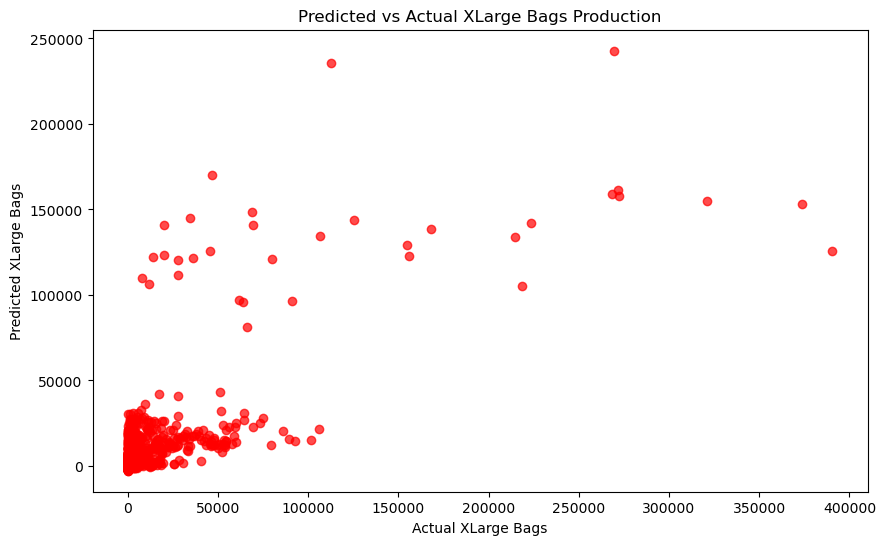

In [7]:
# Split the data into training and testing sets for XLarge Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_xlarge_bags, test_size=0.2, random_state=42)

# Train the model for XLarge Bags
model_xlarge_bags = LinearRegression()
model_xlarge_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_xlarge_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'XLarge Bags - Mean Squared Error: {mse}')
print(f'XLarge Bags - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='r')
plt.title('Predicted vs Actual XLarge Bags Production')
plt.xlabel('Actual XLarge Bags')
plt.ylabel('Predicted XLarge Bags')
plt.show()


## Inference:

Small Bags: The points show a moderate alignment with the diagonal, indicating the model captures some trends but has errors in predicting small bag sales. The scatter indicates room for improvement, especially for higher sales volumes.

Large Bags: The predictions for large bags are closer to the actual values, showing better alignment with the diagonal line. This suggests the model performs reasonably well for this category, with fewer deviations compared to small bags.

XLarge Bags: The predictions for XLarge bags show more variability, with significant scatter around the diagonal. This indicates the model struggles to accurately predict sales for XLarge bags, possibly due to limited data or higher variability in this category.

# Random Forest Regression Model Approach

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Set random seed for reproducibility
random_seed = 42

Small Bags - Random Forest - Mean Squared Error: 11954743038.547838
Small Bags - Random Forest - R-squared: 0.9815858825549427


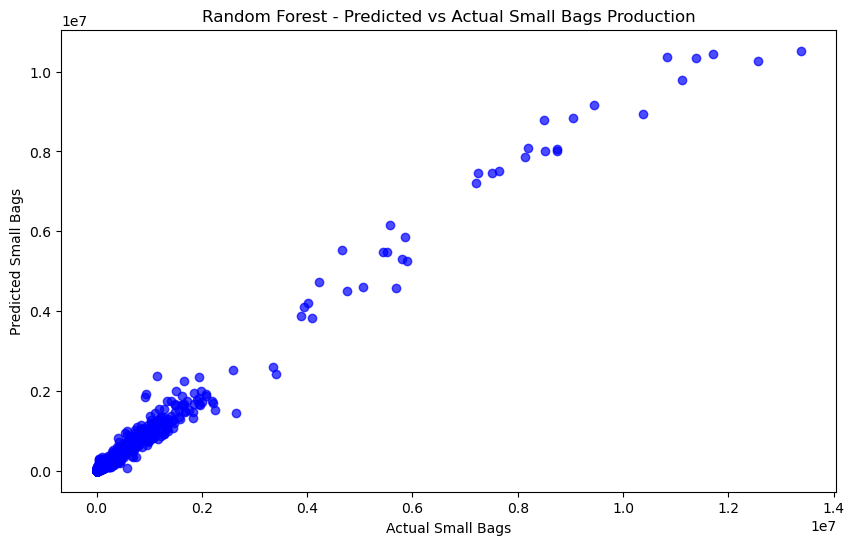

In [9]:
# Split the data into training and testing sets for Small Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_small_bags, test_size=0.2, random_state=random_seed)

# Train the Random Forest model for Small Bags
rf_model_small_bags = RandomForestRegressor(n_estimators=100, random_state=random_seed)
rf_model_small_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model_small_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Small Bags - Random Forest - Mean Squared Error: {mse}')
print(f'Small Bags - Random Forest - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.title('Random Forest - Predicted vs Actual Small Bags Production')
plt.xlabel('Actual Small Bags')
plt.ylabel('Predicted Small Bags')
plt.show()


Large Bags - Random Forest - Mean Squared Error: 8825045876.124598
Large Bags - Random Forest - R-squared: 0.8679096645732767


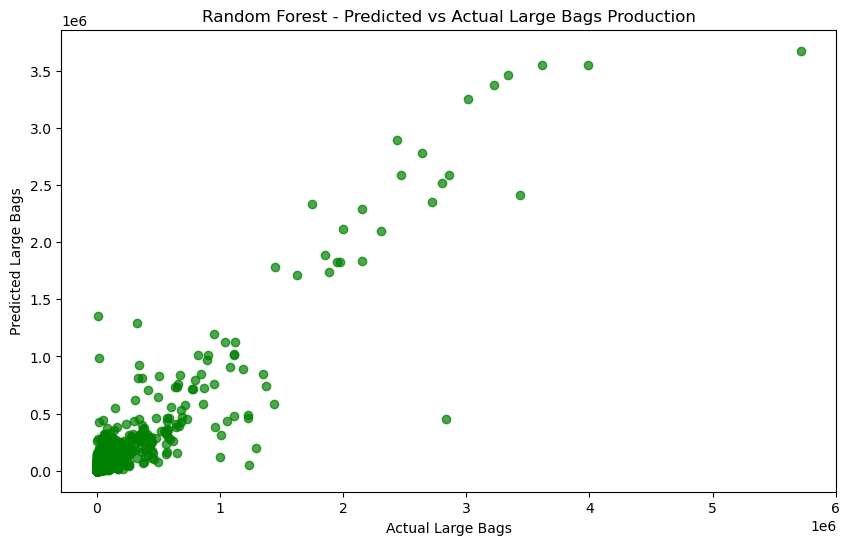

In [10]:
# Split the data into training and testing sets for Large Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_large_bags, test_size=0.2, random_state=random_seed)

# Train the Random Forest model for Large Bags
rf_model_large_bags = RandomForestRegressor(n_estimators=100, random_state=random_seed)
rf_model_large_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model_large_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Large Bags - Random Forest - Mean Squared Error: {mse}')
print(f'Large Bags - Random Forest - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='g')
plt.title('Random Forest - Predicted vs Actual Large Bags Production')
plt.xlabel('Actual Large Bags')
plt.ylabel('Predicted Large Bags')
plt.show()

XLarge Bags - Random Forest - Mean Squared Error: 43261362.30782233
XLarge Bags - Random Forest - R-squared: 0.866935414637041


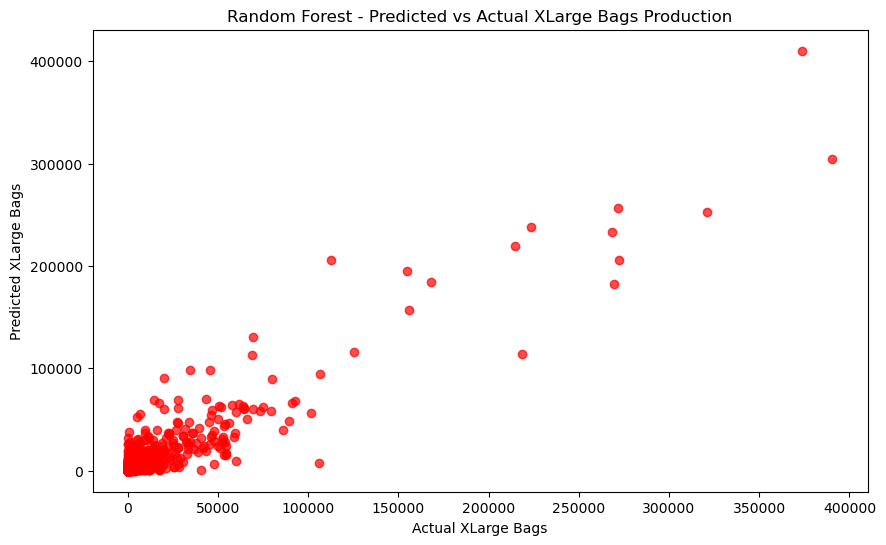

In [11]:
# Split the data into training and testing sets for XLarge Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_xlarge_bags, test_size=0.2, random_state=random_seed)

# Train the Random Forest model for XLarge Bags
rf_model_xlarge_bags = RandomForestRegressor(n_estimators=100, random_state=random_seed)
rf_model_xlarge_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model_xlarge_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'XLarge Bags - Random Forest - Mean Squared Error: {mse}')
print(f'XLarge Bags - Random Forest - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='r')
plt.title('Random Forest - Predicted vs Actual XLarge Bags Production')
plt.xlabel('Actual XLarge Bags')
plt.ylabel('Predicted XLarge Bags')
plt.show()

# XGBoost Model

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

Small Bags - XGBoost - Mean Squared Error: 13663357772.126596
Small Bags - XGBoost - R-squared: 0.9789540708739202


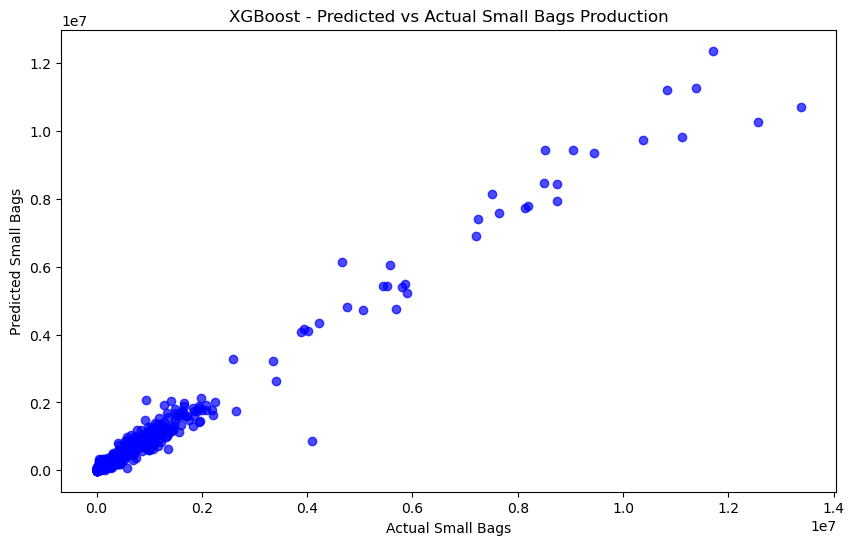

In [13]:
# Split the data into training and testing sets for Small Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_small_bags, test_size=0.2, random_state=42)

# Create the XGBoost model
xgb_model_small_bags = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model_small_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model_small_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Small Bags - XGBoost - Mean Squared Error: {mse}')
print(f'Small Bags - XGBoost - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.title('XGBoost - Predicted vs Actual Small Bags Production')
plt.xlabel('Actual Small Bags')
plt.ylabel('Predicted Small Bags')
plt.show()

Large Bags - XGBoost - Mean Squared Error: 9321887314.238691
Large Bags - XGBoost - R-squared: 0.8604731080799062


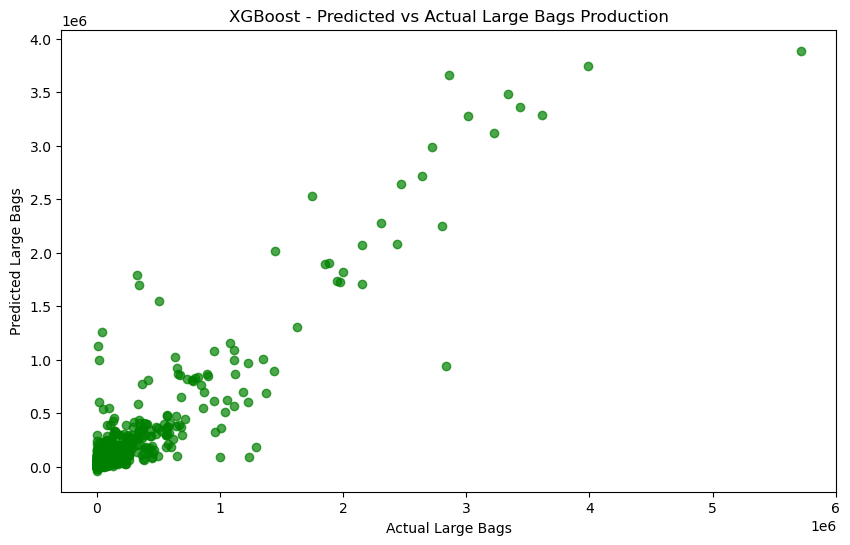

In [14]:
# Split the data into training and testing sets for Large Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_large_bags, test_size=0.2, random_state=42)

# Create the XGBoost model
xgb_model_large_bags = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model_large_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model_large_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Large Bags - XGBoost - Mean Squared Error: {mse}')
print(f'Large Bags - XGBoost - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='g')
plt.title('XGBoost - Predicted vs Actual Large Bags Production')
plt.xlabel('Actual Large Bags')
plt.ylabel('Predicted Large Bags')
plt.show()


XLarge Bags - XGBoost - Mean Squared Error: 49466158.21370955
XLarge Bags - XGBoost - R-squared: 0.8478505187753733


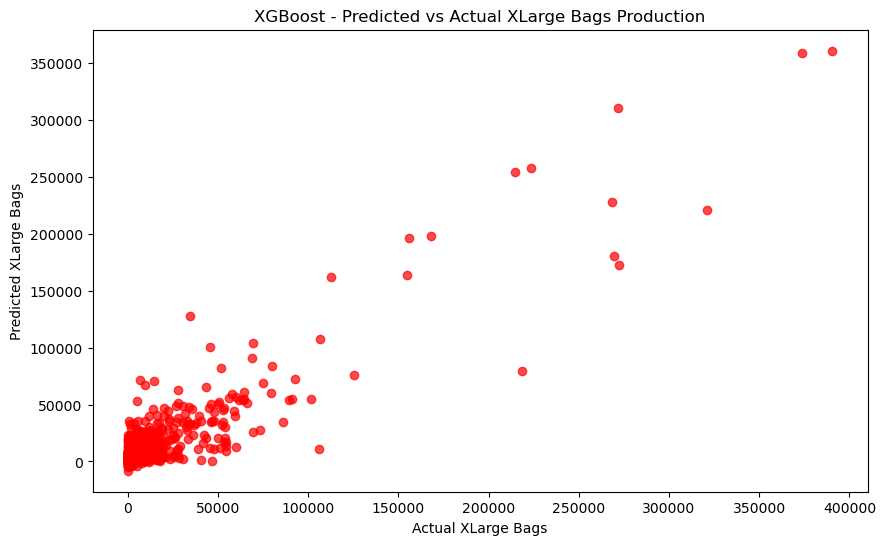

In [15]:
# Split the data into training and testing sets for XLarge Bags
X_train, X_test, y_train, y_test = train_test_split(X, y_xlarge_bags, test_size=0.2, random_state=42)

# Create the XGBoost model
xgb_model_xlarge_bags = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model_xlarge_bags.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model_xlarge_bags.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'XLarge Bags - XGBoost - Mean Squared Error: {mse}')
print(f'XLarge Bags - XGBoost - R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='r')
plt.title('XGBoost - Predicted vs Actual XLarge Bags Production')
plt.xlabel('Actual XLarge Bags')
plt.ylabel('Predicted XLarge Bags')
plt.show()


# K-Fold Cross Validation to compare results for sperate bags

In [16]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
def evaluate_model(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Perform cross-validation for MSE and R-squared
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    return mse_scores.mean(), r2_scores.mean()

small_comparison = []
large_comparison = []
Xlarge_comparison = []

## Small Bags Comparison

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model_small = LinearRegression()

# Evaluate using K-Fold Cross Validation
mse, r2 = evaluate_model(linear_model_small, X, y_small_bags)
small_comparison.append((mse, r2))
print(f'Multiple Linear Regression - Small Bags - MSE: {mse}, R-squared: {r2}')

Multiple Linear Regression - Small Bags - MSE: 34663101373.23791, R-squared: 0.9377371884408809


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model_small = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate using K-Fold Cross Validation
mse, r2 = evaluate_model(rf_model_small, X, y_small_bags)
print(f'Random Forest - Small Bags - MSE: {mse}, R-squared: {r2}')


Random Forest - Small Bags - MSE: 7479919515.483487, R-squared: 0.9867661890484261


In [20]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model_small = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Evaluate using K-Fold Cross Validation
mse, r2 = evaluate_model(xgb_model_small, X, y_small_bags)
print(f'XGBoost - Small Bags - MSE: {mse}, R-squared: {r2}')

XGBoost - Small Bags - MSE: 8784520621.86882, R-squared: 0.9843804609190417


## Large Bags Comparison

In [ ]:
# Initialize the model
linear_model_large = LinearRegression()

# Evaluate using K-Fold Cross Validation
mse, r2 = evaluate_model(linear_model_large, X, y_large_bags)
print(f'Multiple Linear Regression - Large Bags - MSE: {mse}, R-squared: {r2}')

In [21]:
# Initialize the Random Forest model
rf_model_large = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate using K-Fold Cross Validation
mse, r2 = evaluate_model(rf_model_large, X, y_large_bags)
print(f'Random Forest - Large Bags - MSE: {mse}, R-squared: {r2}')


Random Forest - Large Bags - MSE: 6309130342.419153, R-squared: 0.8951190094502962


In [22]:
# Initialize the XGBoost model
xgb_model_large = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Evaluate using K-Fold Cross Validation
mse, r2 = evaluate_model(xgb_model_large, X, y_large_bags)
print(f'XGBoost - Large Bags - MSE: {mse}, R-squared: {r2}')

XGBoost - Large Bags - MSE: 7777090567.639758, R-squared: 0.8701404092062474


## XLarge Bags

In [23]:
# Initialize the model
linear_model_xlarge = LinearRegression()

# Evaluate using K-Fold Cross Validation
mse, r2 = evaluate_model(linear_model_xlarge, X, y_xlarge_bags)
print(f'Multiple Linear Regression - XLarge Bags - MSE: {mse}, R-squared: {r2}')

Multiple Linear Regression - XLarge Bags - MSE: 136909942.65183145, R-squared: 0.56624666326454


In [24]:
# Initialize the Random Forest model
rf_model_xlarge = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate using K-Fold Cross Validation
mse, r2 = evaluate_model(rf_model_xlarge, X, y_xlarge_bags)
print(f'Random Forest - XLarge Bags - MSE: {mse}, R-squared: {r2}')


Random Forest - XLarge Bags - MSE: 52662673.789579585, R-squared: 0.8247615609862816
